In [1]:
import pandas as pd

In [2]:
#read the preprocessed data from the pickle file
data=pd.read_pickle("corpus.pkl")

In [3]:
data

,Party,Handle,Tweet,Party_log,clean_tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P...",1,today senate dems vote savetheinternet proud s...
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...,1,winterhavensun winter haven resident alta vist...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...,1,nbclatino repdarrensoto noted hurricane maria ...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...,1,nalcabpolicy meeting repdarrensoto thanks taki...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...,1,vegalteno hurricane season start june st puert...
...,...,...,...,...,...
86455,Republican,RepTomPrice,Check out my op-ed on need for End Executive O...,0,check op ed need end executive overreach act w...
86456,Republican,RepTomPrice,"Yesterday, Betty &amp; I had a great time lear...",0,yesterday betty great time learning forestry i...
86457,Republican,RepTomPrice,We are forever grateful for the service and sa...,0,forever grateful service sacrifice major barney
86458,Republican,RepTomPrice,Happy first day of school @CobbSchools! #CobbB...,0,happy first day school cobbschools cobbbacktos...


## Top Hash Tags

In [6]:
#load the packges required for EDA 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt
from pandas import Series
import seaborn as sns
import re

In [7]:
def hash_tags(tweet):
        #find all the hash tags in the tweets
        hashtag = re.findall('(\#[A-Za-z_]+)', tweet)
        #if there is hash tag return them
        if hashtag:
            return hashtag
        else:
             return ""

In [8]:
df_h = data
df_h['top_hashtags'] = df_h['Tweet'].apply(lambda x:hash_tags(x))

In [9]:
df_h['top_hashtags']

0        [#SaveTheInternet, #NetNeutrality]
1                                          
2                                          
3                           [#NALCABPolicy]
4                                          
                        ...                
86455                                      
86456                                      
86457                                      
86458                   [#CobbBackToSchool]
86459                               [#Zika]
Name: top_hashtags, Length: 86460, dtype: object

In [10]:
#initial empty lists for each party
hashtags_rep = []
hashtags_dem = []

for n in range(len(df_h['top_hashtags'])):
    #if party is 0 then republican else democrat hashtag
    if df_h['Party_log'][n] == 0:
        hashtags_rep += df_h['top_hashtags'][n]
    elif df_h['Party_log'][n] == 1:
        hashtags_dem += df_h['top_hashtags'][n]

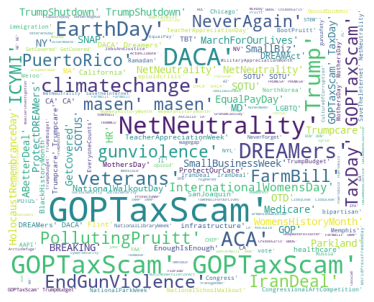

In [202]:
Democrat_Hashtags =''
stopwords = set(STOPWORDS)
    
    
# typecaste each val to string 
hashtags_list_dem = str(hashtags_dem) 
  
# split the value 
tokens = hashtags_list_dem.split()  
      
Democrat_Hashtags += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 500, height = 400, 
                background_color ='white',  
                min_font_size = 5).generate(Democrat_Hashtags) 
  
# plot the WordCloud image                        
plt.figure(figsize = (5, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

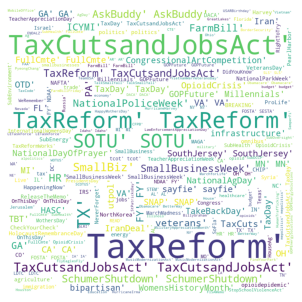

In [203]:
    Republican_Hashtags =''
   
    # typecaste each val to string 
    hashtags_list_rep = str(hashtags_list_rep) 
  
    # split the value 
    tokens_rep = hashtags_list_rep.split()  
      
    Republican_Hashtags += " ".join(tokens_rep)+" "
  
    wordcloud = WordCloud(width = 500, height = 400, 
                background_color ='white', 
                min_font_size = 5).generate(Republican_Hashtags) 
  
    # plot the WordCloud image                        
    plt.figure(figsize = (5, 4), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show()

## Top Words 


In [11]:
from nltk.tokenize import word_tokenize
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import numpy as np
%matplotlib inline

In [23]:
#assiging tweets to respective parties 
democrat_tweets=data[data.Party=="Democrat"] 
republican_tweets=data[data.Party=="Republican"]

In [24]:
#Converting the preprocessed democrat_tweets to list
democrat_Tweets=democrat_tweets.clean_tweet.tolist()
#split into words
democrat_tweets=str(democrat_Tweets).split()
#remove the ,[,],' from the data
democrat_tweets=[word.replace("'","") for word in democrat_tweets ]
democrat_tweets=[word.replace("[", "") for word in democrat_tweets ]
democrat_tweets=[word.replace("]","") for word in democrat_tweets ]
democrat_tweets=[word.replace(",", "") for word in democrat_tweets ]

In [26]:
#similar way do it for republican
republican_Tweets=republican_tweets.clean_tweet.tolist()
republican_tweets=str(republican_Tweets).split()
republican_tweets=[word.replace("'","") for word in republican_tweets ]
republican_tweets=[word.replace("[", "") for word in republican_tweets ]
republican_tweets=[word.replace("]","") for word in republican_tweets ]
republican_tweets=[word.replace(",", "") for word in republican_tweets ]

In [40]:
from nltk.probability import FreqDist
#FreqDist records the number of times each words are used. 
fdist_democrat = FreqDist(democrat_tweets)
print("Frequency of each Word in Democrats")
fdist_democrat

Frequency of each Word in Democrats


FreqDist({'today': 3850, 'trump': 2502, 'american': 2053, 'year': 1835, 'thank': 1777, 'family': 1694, 'great': 1676, 'student': 1660, 'day': 1571, 'congress': 1518, ...})

In [41]:
fdist_republican=FreqDist(republican_tweets)
print("Frequency of each Word in Republicans")
fdist_republican

Frequency of each Word in Republicans


FreqDist({'today': 4883, 'tax': 2885, 'great': 2876, 'house': 2382, 'bill': 2379, 'american': 2241, 'thank': 2118, 'year': 1961, 'day': 1887, 'act': 1820, ...})

In [42]:
#Sort the count of each words in decending order to get the top 5
Dem_freqw=Series(fdist_democrat).sort_values(ascending=False).head(5)
Rep_freqw=Series(fdist_republican).sort_values(ascending=False).head(5)

In [43]:
#labels 
type_labels_Dem = Dem_freqw.sort_values().index 
type_counts_Dem = Dem_freqw.sort_values()

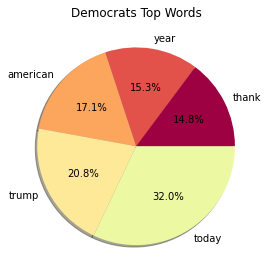

In [44]:
plt.figure(1, figsize=(20,10)) 
the_grid = GridSpec(2,2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='Democrats Top Words')
type_show_ids = plt.pie(type_counts_Dem, labels=type_labels_Dem, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

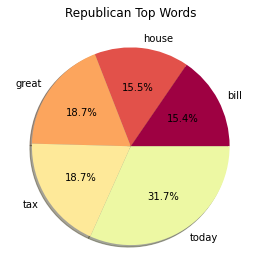

In [45]:
type_labels_Rep = Rep_freqw.sort_values().index 
type_counts_Rep = Rep_freqw.sort_values()
plt.figure(1, figsize=(20,10)) 
the_grid = GridSpec(2,2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='Republican Top Words')
type_show_ids = plt.pie(type_counts_Rep, labels=type_labels_Rep, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

In [37]:
#Top Words in Overall Tweets:

Total_Tweets = democrat_tweets + republican_tweets


In [38]:
FreqTotal = FreqDist(Total_Tweets)
FreqTotal

FreqDist({'today': 8733, 'great': 4552, 'american': 4294, 'tax': 4112, 'thank': 3895, 'house': 3894, 'bill': 3822, 'year': 3796, 'day': 3458, 'family': 3210, ...})

## Sentiment Analysis

## If there is a prefix as"not" then the standard polarity score will be multiplied by -0.5
## For a prefix "very" the subjectivity gets multiplied by 1.3
## textblob finds all the words and phrases that it can assogn a polarity and subjectivity to, and averages all of them together

In [48]:
from textblob import TextBlob

In [49]:
democrat_tweets=data[data.Party=="Democrat"] 
republican=data[data.Party=="Republican"]

In [50]:
print("Democrat tweets word length:",len(democrat_tweets))
print("Republican tweets word length:",len(republican_tweets))

Democrat tweets word length: 42068
Republican tweets word length: 459665


In [51]:
#Sentiment analysis-Democrat Tweets
democratblob=TextBlob(str(democrat_tweets))
democratblob.sentiment

Sentiment(polarity=0.34027777777777785, subjectivity=0.4555555555555555)

In [52]:
#Sentiment analysis-Republican Tweets
republicanblob=TextBlob(str(republican_tweets))
republicanblob.sentiment


Sentiment(polarity=0.19837398561739605, subjectivity=0.4590746992419168)